In [2]:
# Sample web server log data (you can replace this with your own data)
log_data = """
127.0.0.1 - - [12/Dec/2023:10:15:32 +0000] "GET /index.html HTTP/1.1" 200 2048
192.168.0.2 - - [12/Dec/2023:10:16:10 +0000] "POST /login HTTP/1.1" 302 512
127.0.0.1 - - [12/Dec/2023:10:17:15 +0000] "GET /profile HTTP/1.1" 404 0
192.168.0.2 - - [12/Dec/2023:10:18:25 +0000] "GET /dashboard HTTP/1.1" 200 1024
"""
log_lines = log_data.split('\n')

# Displaying the log lines to confirm the data is loaded correctly
for line in log_lines:
    if line.strip():
        print(line)


127.0.0.1 - - [12/Dec/2023:10:15:32 +0000] "GET /index.html HTTP/1.1" 200 2048
192.168.0.2 - - [12/Dec/2023:10:16:10 +0000] "POST /login HTTP/1.1" 302 512
127.0.0.1 - - [12/Dec/2023:10:17:15 +0000] "GET /profile HTTP/1.1" 404 0
192.168.0.2 - - [12/Dec/2023:10:18:25 +0000] "GET /dashboard HTTP/1.1" 200 1024


In [3]:
import re
import pandas as pd

# Define a regular expression pattern to parse the log data
pattern = r'(?P<ip>\S+) \S+ \S+ \[(?P<time>[^\]]+)\] "(?P<method>\S+) (?P<path>\S+) \S+" (?P<status>\d{3}) (?P<size>\S+)'

# Parse each log line and store the result in a list of dictionaries
parsed_logs = []
for line in log_lines:
    match = re.match(pattern, line.strip())
    if match:
        parsed_logs.append(match.groupdict())

# Convert the parsed logs into a DataFrame
df_logs = pd.DataFrame(parsed_logs)

# Convert status and size to numeric types for analysis
df_logs['status'] = pd.to_numeric(df_logs['status'], errors='coerce')
df_logs['size'] = pd.to_numeric(df_logs['size'], errors='coerce')

# Display the first few rows of the parsed log data
df_logs.head()


<ipython-input-3-564db62fda73>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,ip,time,method,path,status,size
0,127.0.0.1,12/Dec/2023:10:15:32 +0000,GET,/index.html,200,2048
1,192.168.0.2,12/Dec/2023:10:16:10 +0000,POST,/login,302,512
2,127.0.0.1,12/Dec/2023:10:17:15 +0000,GET,/profile,404,0
3,192.168.0.2,12/Dec/2023:10:18:25 +0000,GET,/dashboard,200,1024


In [4]:
# Simple tokenization by splitting the path into words
df_logs['tokens'] = df_logs['path'].apply(lambda x: x.lower().split('/'))

# Display the processed tokens
df_logs[['path', 'tokens']].head()


,path,tokens
0,/index.html,"[, index.html]"
1,/login,"[, login]"
2,/profile,"[, profile]"
3,/dashboard,"[, dashboard]"


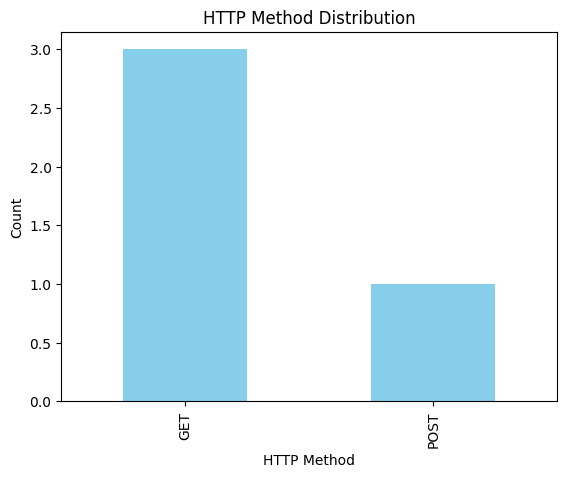

In [5]:
# Count the occurrences of each HTTP method
method_counts = df_logs['method'].value_counts()

# Plotting the HTTP method distribution
import matplotlib.pyplot as plt

method_counts.plot(kind='bar', color='skyblue', title='HTTP Method Distribution')
plt.xlabel('HTTP Method')
plt.ylabel('Count')
plt.show()


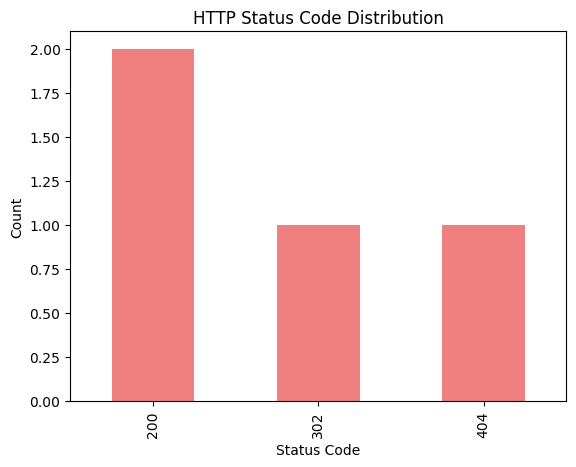

In [6]:
# Count the occurrences of each status code
status_counts = df_logs['status'].value_counts()

# Plotting the status code distribution
status_counts.plot(kind='bar', color='lightcoral', title='HTTP Status Code Distribution')
plt.xlabel('Status Code')
plt.ylabel('Count')
plt.show()
